# <center> Prediksi Harga Saham PT Bank Central Asia Tbk  Menggunakan Metode Simple Moving Average dan Exponential Moving Average (2018-2022)

**Kelompok 5:** 
    
Ilham Ramadhan Nur Ahmad 23102010039
    
M. S. Driaulia 23102010084
    
Phillip Fabian 23102010023
    
William Stevanno 23102010042

### 3.6 Prosedur Penelitian

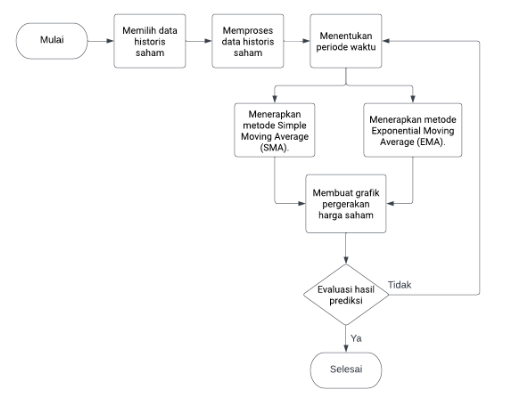

### Step1: Import Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BBCA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,4380.0,4380.0,4380.0,4380.0,3965.378418,0
1,2018-01-02,4380.0,4505.0,4365.0,4380.0,3965.378418,82303500
2,2018-01-03,4385.0,4390.0,4265.0,4380.0,3965.378418,68214000
3,2018-01-04,4380.0,4445.0,4380.0,4445.0,4024.225342,76567000
4,2018-01-05,4460.0,4480.0,4435.0,4450.0,4028.751953,65268000
...,...,...,...,...,...,...,...
1249,2022-12-26,8500.0,8625.0,8500.0,8575.0,8406.959961,20495900
1250,2022-12-27,8600.0,8650.0,8575.0,8600.0,8431.469727,27193800
1251,2022-12-28,8650.0,8650.0,8550.0,8650.0,8480.490234,40420200
1252,2022-12-29,8525.0,8600.0,8500.0,8575.0,8406.959961,47020900


### Step2: Data Preparation & Cleaning

In [3]:
df.shape

(1254, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1254 non-null   object 
 1   Open       1254 non-null   float64
 2   High       1254 non-null   float64
 3   Low        1254 non-null   float64
 4   Close      1254 non-null   float64
 5   Adj Close  1254 non-null   float64
 6   Volume     1254 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.7+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

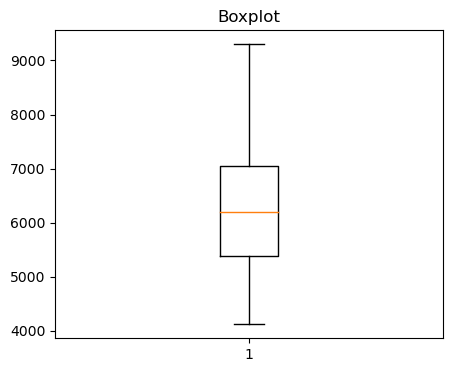

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize =(5, 4))

# Creating plot
plt.boxplot(df['Close'])
plt.title('Boxplot')
# show plot
plt.show()

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,6240.797448,6299.637161,6180.031898,6240.506380,5885.337849,8.243777e+07
std,1177.780269,1189.948948,1171.476411,1181.401768,1248.721044,5.189779e+07
min,4190.000000,4210.000000,4120.000000,4120.000000,3758.402100,0.000000e+00
25%,5410.000000,5485.000000,5331.250000,5387.500000,4990.673828,5.425972e+07
50%,6192.500000,6240.000000,6130.000000,6190.000000,5800.121582,7.263465e+07
75%,7072.500000,7123.750000,7000.000000,7048.750000,6706.294922,9.859212e+07
max,9275.000000,9400.000000,9000.000000,9300.000000,9082.293945,6.443596e+08


In [8]:
df1 = df[['Date', 'Close']]
df1

,Date,Close
0,2018-01-01,4380.0
1,2018-01-02,4380.0
2,2018-01-03,4380.0
3,2018-01-04,4445.0
4,2018-01-05,4450.0
...,...,...
1249,2022-12-26,8575.0
1250,2022-12-27,8600.0
1251,2022-12-28,8650.0
1252,2022-12-29,8575.0


In [9]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date')

,Close
Date,
2018-01-01,4380.0
2018-01-02,4380.0
2018-01-03,4380.0
2018-01-04,4445.0
2018-01-05,4450.0
...,...
2022-12-26,8575.0
2022-12-27,8600.0
2022-12-28,8650.0


### Visualiazation Data

<Figure size 1200x600 with 0 Axes>

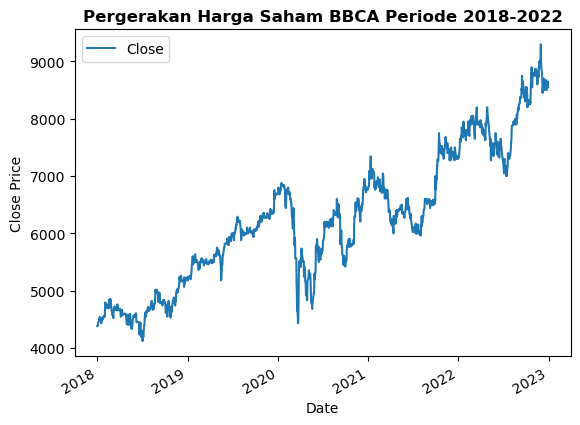

In [10]:
plt.figure(figsize=(12,6))
ax=df1.plot(x='Date',y=['Close'])
ax.set_ylabel('Close Price')
plt.title("Pergerakan Harga Saham BBCA Periode 2018-2022",fontweight="bold", size=12)
plt.show()

### Step3: Modeling SMA & EMA

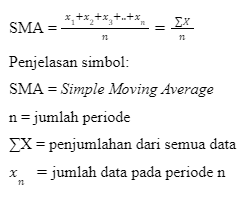

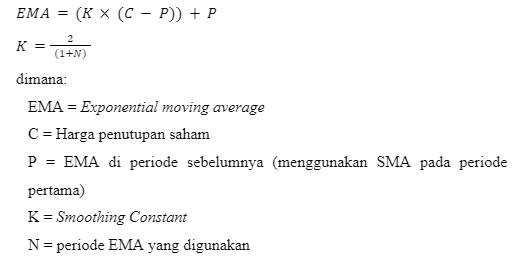

In [11]:
df1['SMA5'] = df1['Close'].rolling(5).mean()
df1['SMA20'] = df1['Close'].rolling(20).mean()
df1['SMA50'] = df1['Close'].rolling(50).mean()
df1['SMA80'] = df1['Close'].rolling(80).mean()
df1['SMA200'] = df1['Close'].rolling(200).mean()
df1['SMA250'] = df1['Close'].rolling(250).mean()

df1['EMA5'] = df1['Close'].ewm(span=5, adjust=False).mean()
df1['EMA20'] = df1['Close'].ewm(span=20, adjust=False).mean()
df1['EMA50'] = df1['Close'].ewm(span=50, adjust=False).mean()
df1['EMA80'] = df1['Close'].ewm(span=80, adjust=False).mean()
df1['EMA200'] = df1['Close'].ewm(span=200, adjust=False).mean()
df1['EMA250'] = df1['Close'].ewm(span=250, adjust=False).mean()


df1

,Date,Close,SMA5,SMA20,SMA50,SMA80,SMA200,SMA250,EMA5,EMA20,EMA50,EMA80,EMA200,EMA250
0,2018-01-01,4380.0,NaN,NaN,NaN,NaN,NaN,NaN,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
1,2018-01-02,4380.0,NaN,NaN,NaN,NaN,NaN,NaN,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
2,2018-01-03,4380.0,NaN,NaN,NaN,NaN,NaN,NaN,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
3,2018-01-04,4445.0,NaN,NaN,NaN,NaN,NaN,NaN,4401.666667,4386.190476,4382.549020,4381.604938,4380.646766,4380.517928
4,2018-01-05,4450.0,4407.0,NaN,NaN,NaN,NaN,NaN,4417.777778,4392.267574,4385.194156,4383.293705,4381.336848,4381.071570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2022-12-26,8575.0,8580.0,8691.25,8728.0,8608.1250,8038.500,7972.0,8573.732241,8653.146291,8640.315895,8531.772702,8130.202907,7995.394365
1250,2022-12-27,8600.0,8585.0,8672.50,8734.0,8612.1875,8043.000,7976.9,8582.488161,8648.084740,8638.734879,8533.457327,8134.877505,8000.211940
1251,2022-12-28,8650.0,8580.0,8640.00,8741.5,8615.6250,8048.000,7982.2,8604.992107,8648.267146,8639.176649,8536.334924,8140.003102,8005.389534
1252,2022-12-29,8575.0,8580.0,8618.75,8743.0,8618.4375,8051.625,7987.3,8594.994738,8641.289322,8636.659917,8537.289617,8144.331429,8009.928263


### Step4: Result

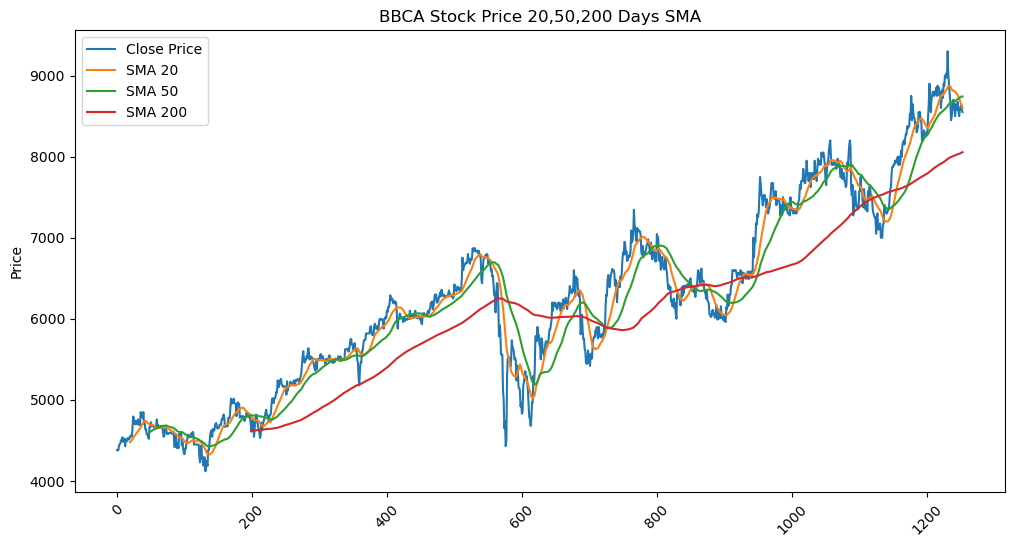

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Close Price')
plt.plot(df1['SMA20'], label='SMA 20')
plt.plot(df1['SMA50'], label='SMA 50')
plt.plot(df1['SMA200'], label='SMA 200')

plt.ylabel('Price')
plt.title('BBCA Stock Price 20,50,200 Days SMA')
plt.legend()
plt.xticks(rotation=45)
plt.show()

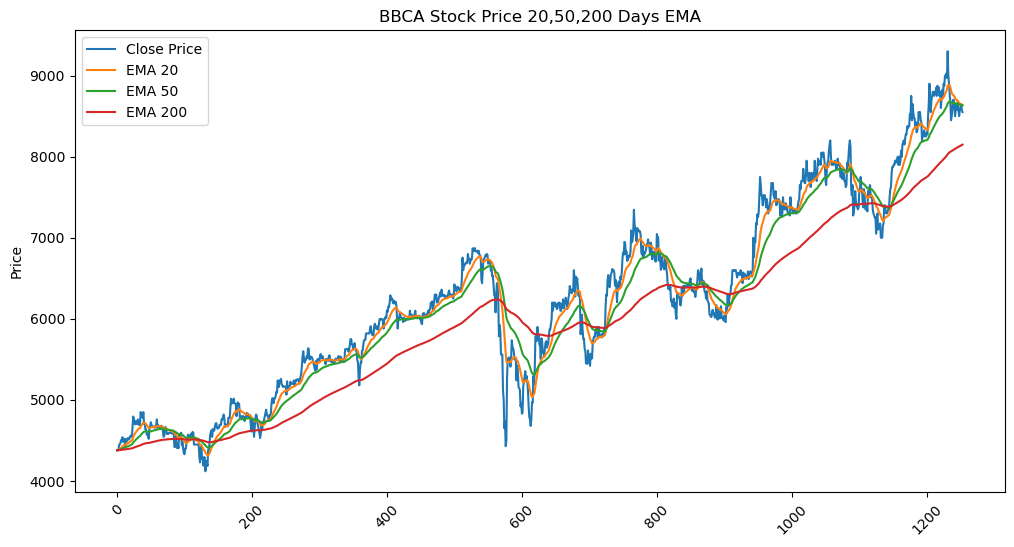

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Close Price')
plt.plot(df1['EMA20'], label='EMA 20')
plt.plot(df1['EMA50'], label='EMA 50')
plt.plot(df1['EMA200'], label='EMA 200')

plt.ylabel('Price')
plt.title('BBCA Stock Price 20,50,200 Days EMA')
plt.legend()
plt.xticks(rotation=45)
plt.show()

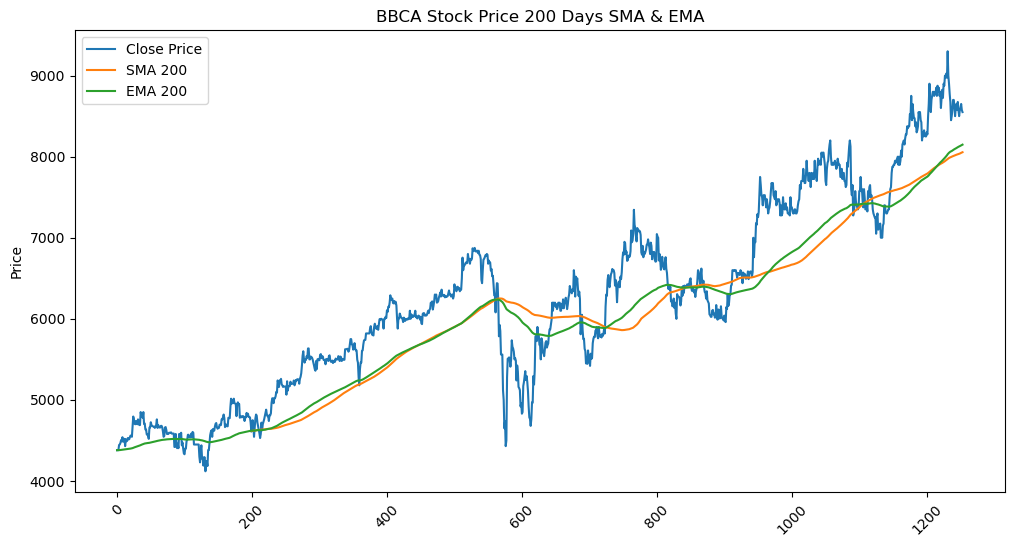

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Close Price')
plt.plot(df1['SMA200'], label='SMA 200')
plt.plot(df1['EMA200'], label='EMA 200')

plt.ylabel('Price')
plt.title('BBCA Stock Price 200 Days SMA & EMA')
plt.legend()
plt.xticks(rotation=45)
plt.show()

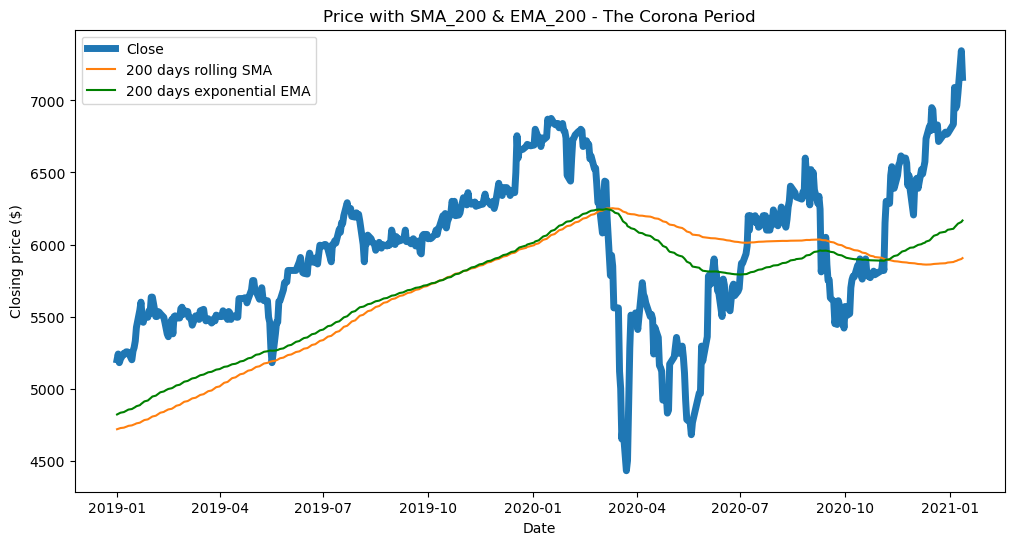

In [15]:
close = df[['Date','Close']]
close['Date'] = pd.to_datetime(close['Date'])
close = close.set_index('Date')
ema_200 = close.ewm(span=200,adjust=True).mean()
sma_200 = close.rolling(200).mean()

plt.figure(figsize = (12,6))
#Plotting the Price Close & SMA V/S  EMA for The Corona Period:
plt.plot(close['2019-01-01':'2021-01-12'], label='Close', linewidth = 5)
plt.plot(sma_200['2019-01-01':'2021-01-12'], label='200 days rolling SMA', linewidth = 1.5)
plt.plot(ema_200['2019-01-01':'2021-01-12'], label='200 days exponential EMA', linewidth = 1.5,color='green')

plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.title('Price with SMA_200 & EMA_200 - The Corona Period')
plt.legend()
plt.show()

### Evaluasi

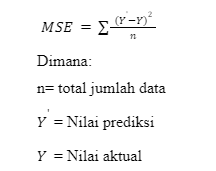

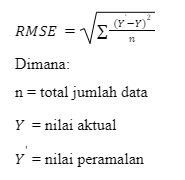

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Menghitung SMA dengan rentang 20, 50, 200 hari
sma_ranges = [20, 50, 200]
for sma_range in sma_ranges:
    column_name = f'SMA_{sma_range}'
    df1[column_name] = df1['Close'].rolling(window=sma_range).mean()

# Menghitung EMA dengan rentang 20, 50, 200 hari
ema_ranges = [20, 50, 200]
for ema_range in ema_ranges:
    column_name = f'EMA_{ema_range}'
    df1[column_name] = df1['Close'].ewm(span=ema_range, adjust=False).mean()
    
df1.dropna(inplace=True)

# Memotong data menjadi data train dan data test (70% untuk train, 30% untuk test)
train_data, test_data = train_test_split(df1, test_size=0.3, shuffle=False)

# Menghitung MSE dan RMSE untuk setiap kolom SMA pada data train
mse_scores_train_sma = {}
rmse_scores_train_sma = {}
for sma_range in sma_ranges:
    column_name = f'SMA_{sma_range}'
    mse_train = mean_squared_error(train_data['Close'], train_data[column_name])
    rmse_train = np.sqrt(mse_train)
    mse_scores_train_sma[column_name] = mse_train
    rmse_scores_train_sma[column_name] = rmse_train

# Menghitung MSE dan RMSE untuk setiap kolom EMA pada data train
mse_scores_train_ema = {}
rmse_scores_train_ema = {}
for ema_range in ema_ranges:
    column_name = f'EMA_{ema_range}'
    mse_train = mean_squared_error(train_data['Close'], train_data[column_name])
    rmse_train = np.sqrt(mse_train)
    mse_scores_train_ema[column_name] = mse_train
    rmse_scores_train_ema[column_name] = rmse_train

# Menghitung MSE dan RMSE untuk setiap kolom SMA pada data test
mse_scores_test_sma = {}
rmse_scores_test_sma = {}
for sma_range in sma_ranges:
    column_name = f'SMA_{sma_range}'
    mse_test = mean_squared_error(test_data['Close'], test_data[column_name])
    rmse_test = np.sqrt(mse_test)
    mse_scores_test_sma[column_name] = mse_test
    rmse_scores_test_sma[column_name] = rmse_test

# Menghitung MSE dan RMSE untuk setiap kolom EMA pada data test
mse_scores_test_ema = {}
rmse_scores_test_ema = {}
for ema_range in ema_ranges:
    column_name = f'EMA_{ema_range}'
    mse_test = mean_squared_error(test_data['Close'], test_data[column_name])
    rmse_test = np.sqrt(mse_test)
    mse_scores_test_ema[column_name] = mse_test
    rmse_scores_test_ema[column_name] = rmse_test

# Menampilkan hasil evaluasi MSE dan RMSE untuk SMA pada data train
print('Evaluasi MSE untuk SMA pada data train:')
for sma_range, mse_train in mse_scores_train_sma.items():
    print(f'SMA_{sma_range}: {mse_train}')

print('Evaluasi RMSE untuk SMA pada data train:')
for sma_range, rmse_train in rmse_scores_train_sma.items():
    print(f'SMA_{sma_range}: {rmse_train}')

# Menampilkan hasil evaluasi MSE dan RMSE untuk EMA pada data train
print('Evaluasi MSE untuk EMA pada data train:')
for ema_range, mse_train in mse_scores_train_ema.items():
    print(f'EMA_{ema_range}: {mse_train}')

print('Evaluasi RMSE untuk EMA pada data train:')
for ema_range, rmse_train in rmse_scores_train_ema.items():
    print(f'EMA_{ema_range}: {rmse_train}')

# Menampilkan hasil evaluasi MSE dan RMSE untuk SMA pada data test
print('Evaluasi MSE untuk SMA pada data test:')
for sma_range, mse_test in mse_scores_test_sma.items():
    print(f'SMA_{sma_range}: {mse_test}')

print('Evaluasi RMSE untuk SMA pada data test:')
for sma_range, rmse_test in rmse_scores_test_sma.items():
    print(f'SMA_{sma_range}: {rmse_test}')

# Menampilkan hasil evaluasi MSE dan RMSE untuk EMA pada data test
print('Evaluasi MSE untuk EMA pada data test:')
for ema_range, mse_test in mse_scores_test_ema.items():
    print(f'EMA_{ema_range}: {mse_test}')

print('Evaluasi RMSE untuk EMA pada data test:')
for ema_range, rmse_test in rmse_scores_test_ema.items():
    print(f'EMA_{ema_range}: {rmse_test}')

Evaluasi MSE untuk SMA pada data train:
SMA_SMA_20: 53940.14082503556
SMA_SMA_50: 134011.36724039828
SMA_SMA_200: 311394.33095128025
Evaluasi RMSE untuk SMA pada data train:
SMA_SMA_20: 232.25016862218973
SMA_SMA_50: 366.0756304923865
SMA_SMA_200: 558.0271776099084
Evaluasi MSE untuk EMA pada data train:
EMA_EMA_20: 39403.667686635374
EMA_EMA_50: 92183.15931899074
EMA_EMA_200: 242021.79266268667
Evaluasi RMSE untuk EMA pada data train:
EMA_EMA_20: 198.50357096696112
EMA_EMA_50: 303.61679683276867
EMA_EMA_200: 491.9571044945755
Evaluasi MSE untuk SMA pada data test:
SMA_SMA_20: 45915.60223509934
SMA_SMA_50: 131452.51741721854
SMA_SMA_200: 523225.2628352649
Evaluasi RMSE untuk SMA pada data test:
SMA_SMA_20: 214.27926226095548
SMA_SMA_50: 362.5638115107719
SMA_SMA_200: 723.3431155649889
Evaluasi MSE untuk EMA pada data test:
EMA_EMA_20: 35370.964567406976
EMA_EMA_50: 99574.12575417772
EMA_EMA_200: 440849.66799724003
Evaluasi RMSE untuk EMA pada data test:
EMA_EMA_20: 188.0717006022091
EM

In [17]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import plotly.express as px

In [18]:
df2 = df[['Date','Close']]
df2

,Date,Close
0,2018-01-01,4380.0
1,2018-01-02,4380.0
2,2018-01-03,4380.0
3,2018-01-04,4445.0
4,2018-01-05,4450.0
...,...,...
1249,2022-12-26,8575.0
1250,2022-12-27,8600.0
1251,2022-12-28,8650.0
1252,2022-12-29,8575.0


In [19]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

In [20]:
ses = SimpleExpSmoothing(df2)

C:\Users\ILHAM RAMADHAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
alpha = 0.2

In [22]:
model = ses.fit(smoothing_level = alpha, optimized = False)

In [23]:
forecast = model.forecast(200)

C:\Users\ILHAM RAMADHAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
forecast

1254    8590.421143
1255    8590.421143
1256    8590.421143
1257    8590.421143
1258    8590.421143
           ...     
1449    8590.421143
1450    8590.421143
1451    8590.421143
1452    8590.421143
1453    8590.421143
Length: 200, dtype: float64

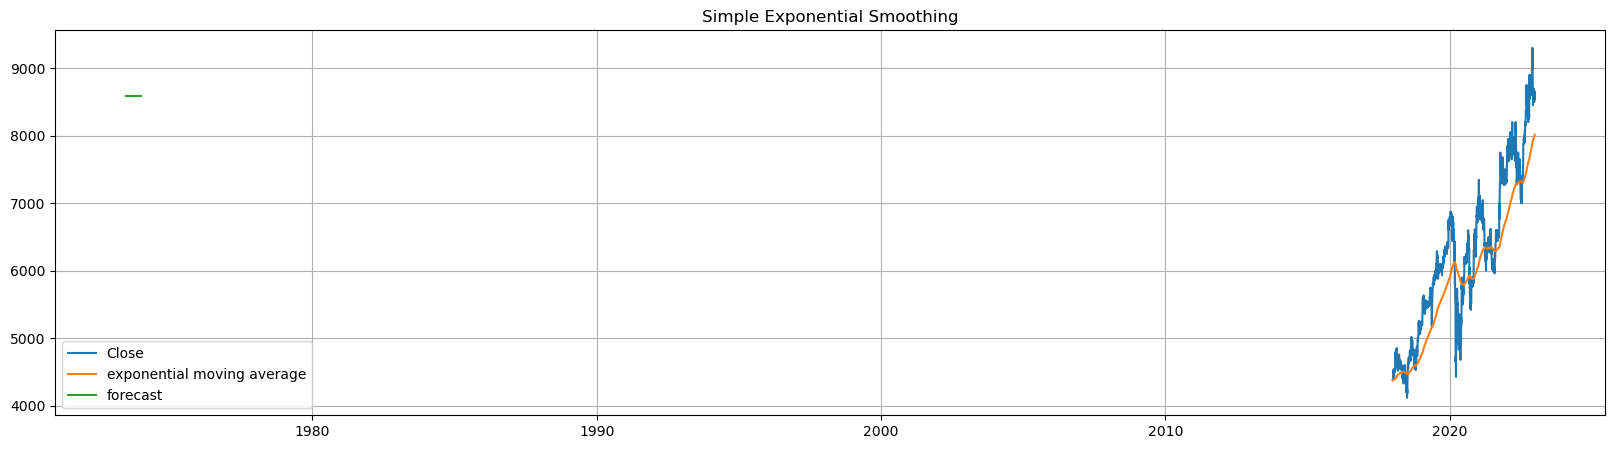

In [25]:
df2['SMA'] = df2['Close'].ewm(span=250, adjust=False).mean()

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(df2['Close'], label='Close')
#plt.plot(test['Close'], label='Test')
plt.plot(df2['SMA'], label='exponential moving average')
plt.plot(forecast, label='forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()